# Exploration

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 72

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('suicide-rates.csv')

print(f'Number of datapoints: {len(df)} \nNumber of features: {len(df.columns)}\n')
print('-----------------------------')
print('Feature datatypes')
print('-----------------------------')
print(df.dtypes)
print('-----------------------------\n')

df.head()

Number of datapoints: 27820 
Number of features: 12

-----------------------------
Feature datatypes
-----------------------------
country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object
-----------------------------



,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
# Get a count of the nulls here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Uniqueness of nominal features

In [4]:
print(f"Country column unique members: {len(df['country'].unique())}")
print(df['country'].unique())
print('-----------------------------\n')

print(f"Sex column unique members: {len(df['sex'].unique())}")
print(df['sex'].unique())
print('-----------------------------\n')

print(f"Age column unique members: {len(df['age'].unique())}")
print(df['age'].unique())
print('-----------------------------\n')

print(f"Generation column unique members: {len(df['generation'].unique())}")
print(df['generation'].unique())
print('-----------------------------\n')

Country column unique members: 101
['Albania' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia'
 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Barbados' 'Belarus' 'Belgium'
 'Belize' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cabo Verde'
 'Canada' 'Chile' 'Colombia' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus'
 'Czech Republic' 'Denmark' 'Dominica' 'Ecuador' 'El Salvador' 'Estonia'
 'Fiji' 'Finland' 'France' 'Georgia' 'Germany' 'Greece' 'Grenada'
 'Guatemala' 'Guyana' 'Hungary' 'Iceland' 'Ireland' 'Israel' 'Italy'
 'Jamaica' 'Japan' 'Kazakhstan' 'Kiribati' 'Kuwait' 'Kyrgyzstan' 'Latvia'
 'Lithuania' 'Luxembourg' 'Macau' 'Maldives' 'Malta' 'Mauritius' 'Mexico'
 'Mongolia' 'Montenegro' 'Netherlands' 'New Zealand' 'Nicaragua' 'Norway'
 'Oman' 'Panama' 'Paraguay' 'Philippines' 'Poland' 'Portugal'
 'Puerto Rico' 'Qatar' 'Republic of Korea' 'Romania' 'Russian Federation'
 'Saint Kitts and Nevis' 'Saint Lucia' 'Saint Vincent and Grenadines'
 'San Marino' 'Serbia' 'Seychelles' 'Singap

### Early look at correlations

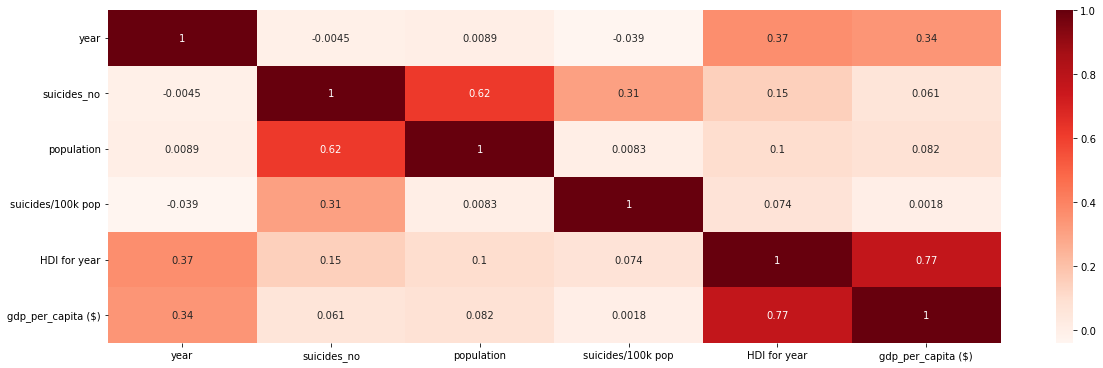

In [5]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds')
plt.show()

The most highly correlated (**before pre-processing**) features are HDI and GDP per capita as well as population and suicide numbers (which is obvious). 

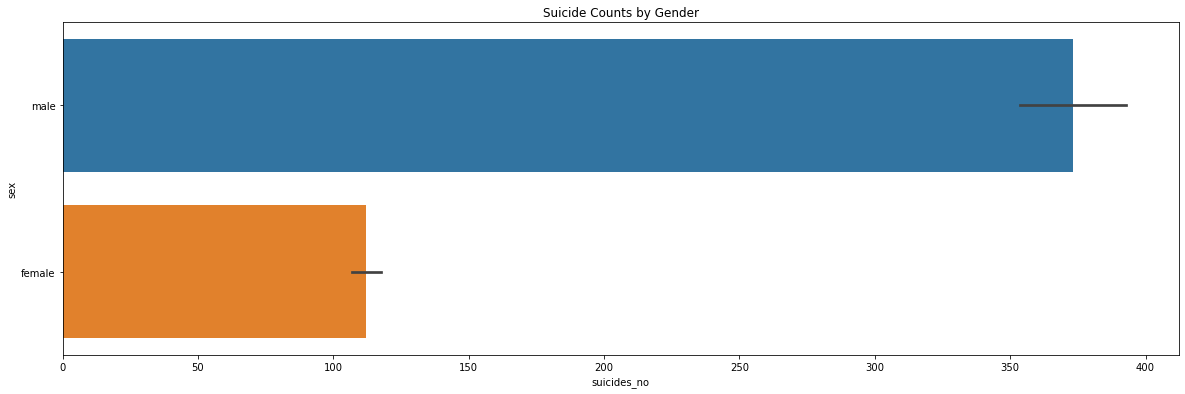

In [6]:
plt.figure(figsize=(20,6))
sns.barplot(data=df, x="suicides_no", y="sex")
plt.title('Suicide Counts by Gender')
plt.show()

Males are clearly much more likely to commit suicide than females. Does this differ by age group?

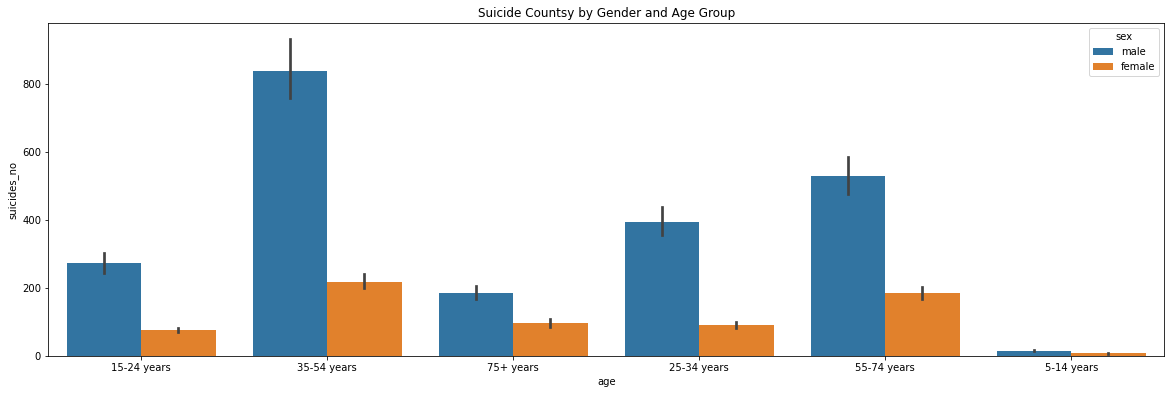

In [7]:
plt.figure(figsize=(20,6))
sns.barplot(x = "age", y = "suicides_no", hue = "sex", data = df)
plt.title("Suicide Countsy by Gender and Age Group")
plt.show()

The pattern of males committing more suicide continues by age group, with the most suicides happening between 35-74 years of age. What about by generation? I would assume the pattern continues, since generation is a proxy for age of sorts, but lets confirm.

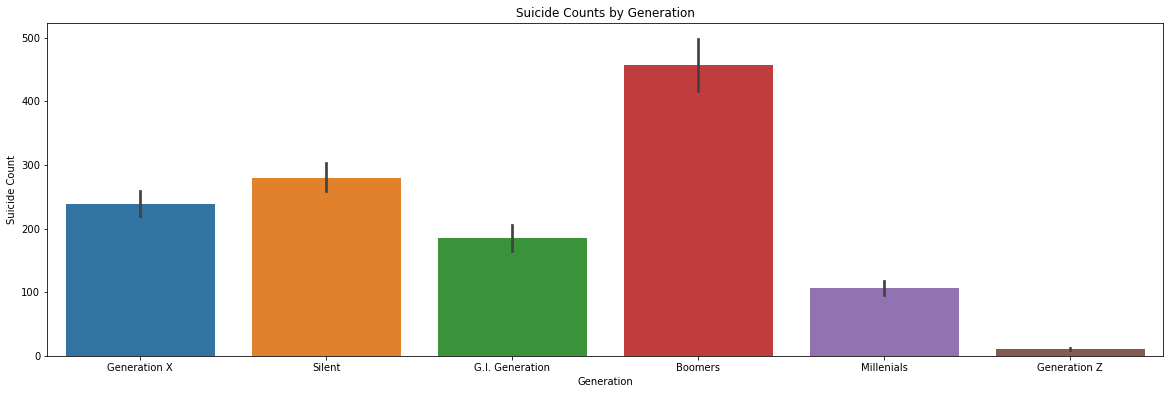

In [8]:
plt.figure(figsize=(20,6))
sns.barplot(x=df['generation'], y=df['suicides_no'])
plt.xlabel('Generation')
plt.ylabel('Suicide Count')
plt.title('Suicide Counts by Generation')
plt.show()

The Boomer and Silent generations have the most suicides, which makes sense considering they go from 1928-1964. What about by country? Is that important?

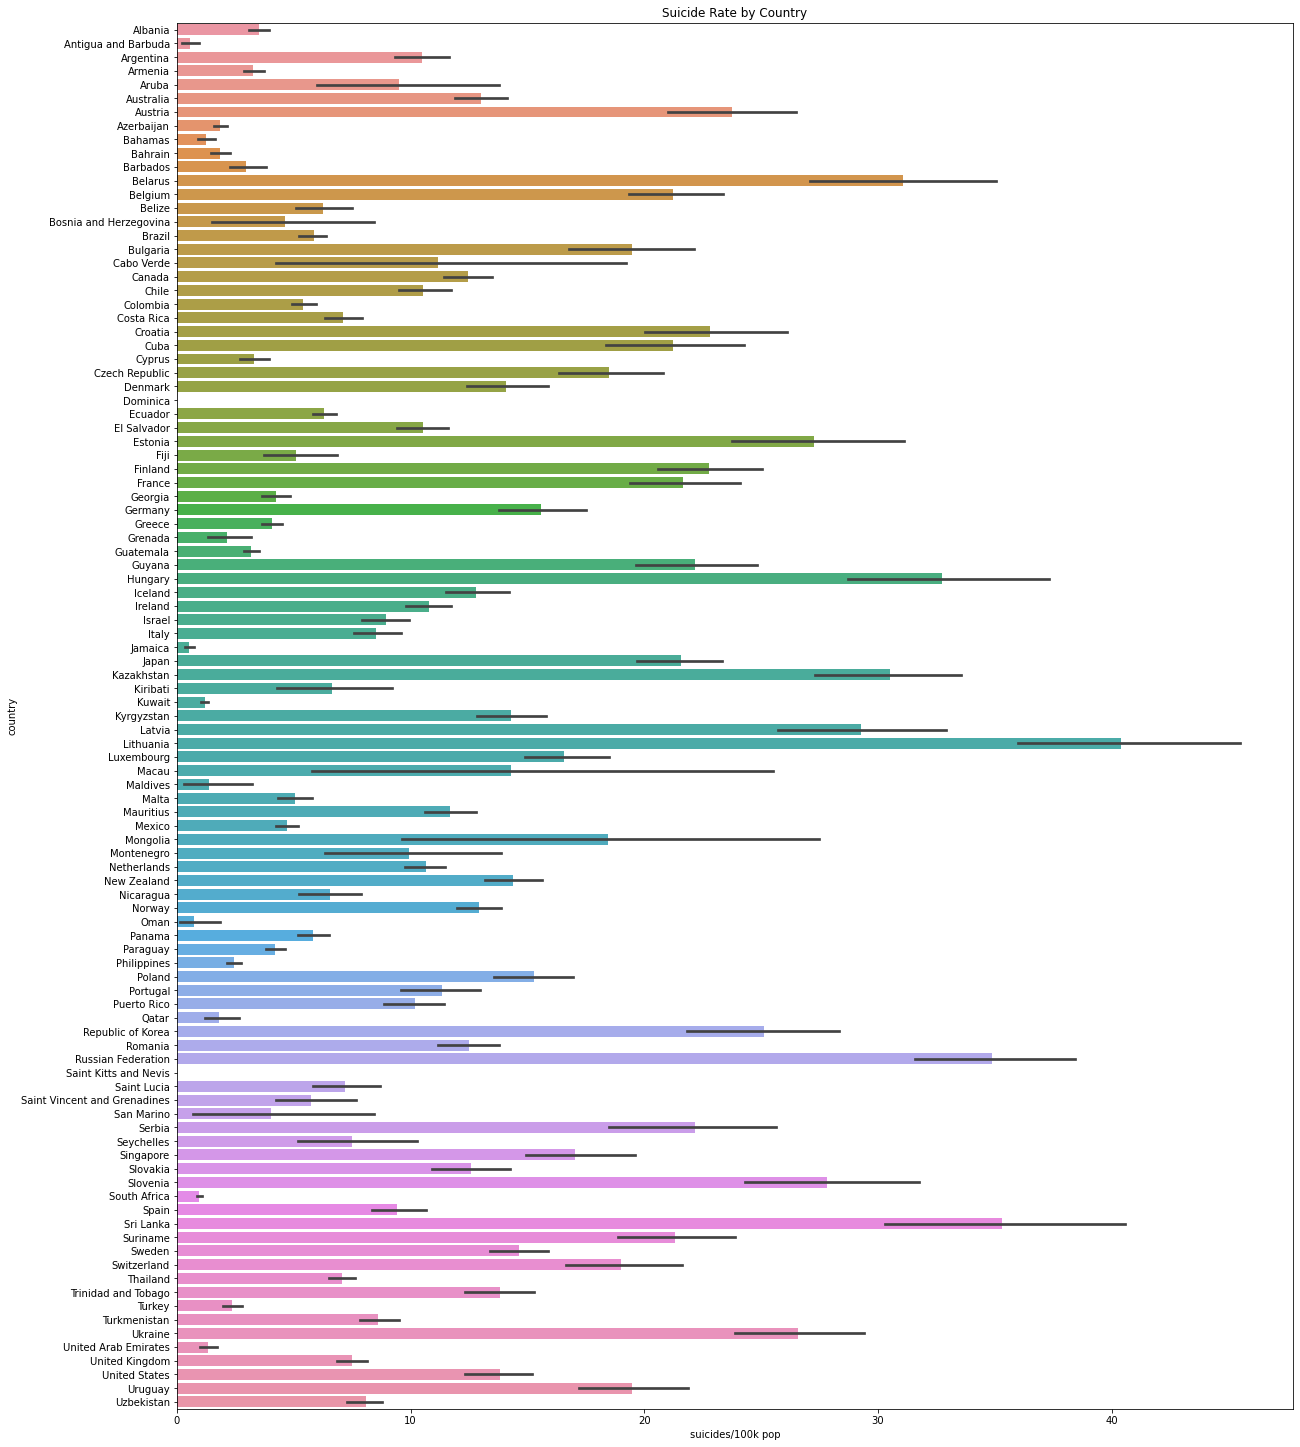

In [9]:
plt.figure(figsize=(20,25))
sns.barplot(x = "suicides/100k pop", y = "country", data = df)
plt.title('Suicide Rate by Country')
plt.show()

Suicide rate seems to be pretty randomly distributed by country -- not seeing any patterns here. Lithuania has the most suicides, while Antigua has the least.

What about the suicide rate over time? Is it increasing or decreasing?

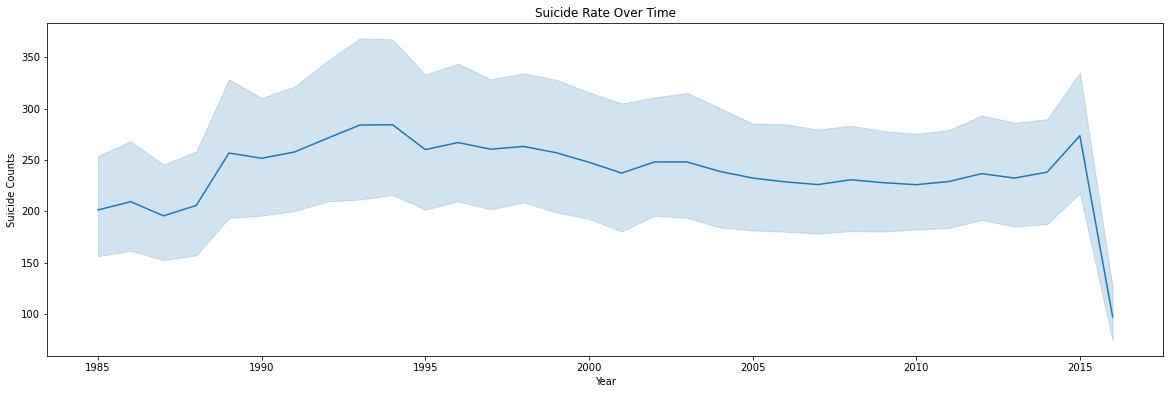

In [10]:
plt.figure(figsize=(20,6))
sns.lineplot(x='year', y='suicides_no', data=df)
plt.xlabel('Year')
plt.ylabel('Suicide Counts')
plt.title('Suicide Rate Over Time')
plt.show()

It seems that the number of suicides was relatively static for a long time...until something happened around 2015 which made them drop percipitously. This is fantastic news, and I hope the trend has continued to today.

## Plotting dependant variable

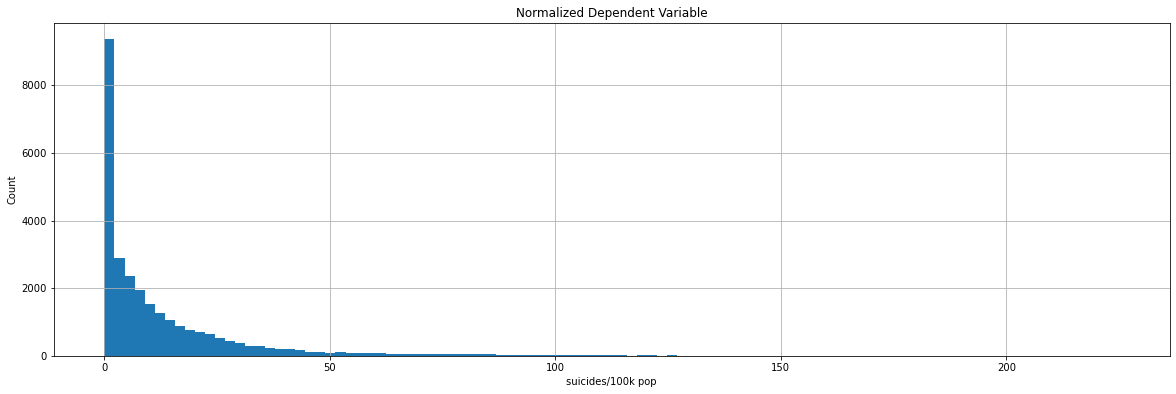

In [11]:
plt.figure(figsize=(20,6))
df['suicides/100k pop'].hist(bins=len(df['country'].unique()))
plt.title('Normalized Dependent Variable')
plt.xlabel('suicides/100k pop')
plt.ylabel('Count')
plt.show()

### Questions 1 - 3

1 - I believe the most important information to "machine learn" here is the suicide count as it relates to predicting whether suicides would increase or decrease. Since we are talking about suicide here, which is a horrible thing, I think if it were possible to predict the direction of these suicides, then people could potentially intervene to stop them. Is it learnable? I really hope so, but my gut is telling me that it is not (at least from this data).

2 - I believe this should be set up as a supervised regression problem using random forests, where, given the data, the model would predict the suicide rate. Per the comments you made in the assignment, however, we can use the predicted suicide rate to do a binary classification via binning/thresholding which would classify that rate into one of two buckets, the "low suicide rate" or "high suicide rate". 

In terms of unsupervised approaches, we could potentially use PCA or clustering to see if there are any patterns in the dataset. This may also help us drop unnecessary columns to increase the performance of our random forest model. 

However, you mentioned in your instructions that we should try and determine whether the outcome is suicide or not via a binary variable with "low suicide rate" and "high suicide rate" via a classification problem. In order to accomplish this, we could take the mean of the suicide rate, add a half standard deviation to it, then use that number as a threshold to create a new column in the dataset which would be a "low/high suicide rate" binary feature. If our suicide rate was above this number, it would be considered high and wed give it a value of 1, while below the number would be considered low and recieve a value of 0. The problem could then be set up as a classification problem where the random forest would try and predict on that.

3 - In my view, the dependant variable should be the suicide rate (suicides/100k pop) if we were to set this up as a regression problem. If we were to set this up as a classification problem, however, the dependent variable should then be the column I spoke about in the #2 answer (low/high suicide rate).


In [12]:
suicide_rate_mean = df['suicides/100k pop'].mean()
suicide_rate_std = df['suicides/100k pop'].std()

print(f'Suicide Rate mean: {suicide_rate_mean:.3f} and std: {suicide_rate_std:.3f}')

suicide_rate_mean_plus_std = suicide_rate_mean + suicide_rate_std/2

print(f'Suicide rate mean + std: {suicide_rate_mean_plus_std:.3f}')
df['low/high suicide rate'] = [1 if num >= suicide_rate_mean_plus_std else 0 for num in df['suicides/100k pop']]

df['low/high suicide rate'].value_counts()

Suicide Rate mean: 12.816 and std: 18.962
Suicide rate mean + std: 22.297


0    22786
1     5034
Name: low/high suicide rate, dtype: int64

### Feature Correlation Matrix after adding low/high suicide rate dependent variable

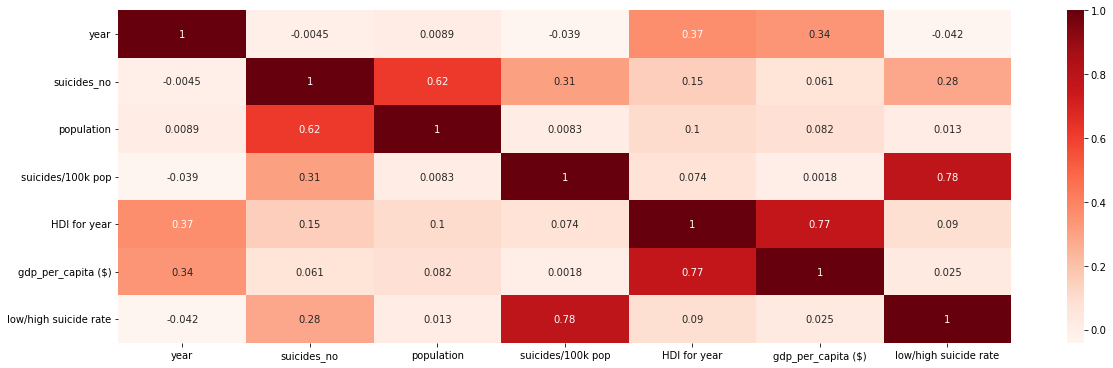

In [13]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Reds')
plt.show()

In [14]:
df.corr(numeric_only=True)['low/high suicide rate'].abs().sort_values(ascending=False)

low/high suicide rate    1.000000
suicides/100k pop        0.783900
suicides_no              0.283050
HDI for year             0.089914
year                     0.041814
gdp_per_capita ($)       0.024739
population               0.013453
Name: low/high suicide rate, dtype: float64

### Question 4

The ranking of the variables is above. The most highly correlated values to my target variable "low/high suicide rate" are "suicides/100k pop", which makes sense considering that is what my target variable was built off of, as well as the suicide_no column, which also makes sense considering that is what suicides/100k pop is built off of.

# Data Preprocessing

In [15]:
df.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),low/high suicide rate
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414,0.180949
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472,0.384983
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000,0.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000,0.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000,0.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,1.000000


In [16]:
df.isnull().sum()

country                      0
year                         0
sex                          0
age                          0
suicides_no                  0
population                   0
suicides/100k pop            0
country-year                 0
HDI for year             19456
 gdp_for_year ($)            0
gdp_per_capita ($)           0
generation                   0
low/high suicide rate        0
dtype: int64

There are a ton of nulls in the HDI column, so I will drop that.

In [17]:
df = df.drop(['HDI for year'], axis = 1)
df.shape

(27820, 12)

In [18]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', ' gdp_for_year ($) ',
       'gdp_per_capita ($)', 'generation', 'low/high suicide rate'],
      dtype='object')

In [19]:
df.isna().any(axis=0)

country                  False
year                     False
sex                      False
age                      False
suicides_no              False
population               False
suicides/100k pop        False
country-year             False
 gdp_for_year ($)        False
gdp_per_capita ($)       False
generation               False
low/high suicide rate    False
dtype: bool

The dataset contains no rows with nulls, which is good.

In [20]:
# Since we determined country does not seem to be relevant, we will drop that as well.
# Also, if we kept this, we would have to one-hot encode it and then we would add a ton of columns
# to our dataset
df = df.drop('country', axis=1)

# We will also drop country-year since that is derived and year is more important
df = df.drop('country-year', axis=1)

# We will also drop gdp_for_year as it is a total measure and is not relevant since we have per capita
df = df.drop(' gdp_for_year ($) ', axis=1)

# We will drop population for the same reason as gdp_for_year and it has a low correlation
df = df.drop('population', axis=1)

# We will drop suicide_no for the same reason as population, even though it has a high correlation. Mistake?
df = df.drop('suicides_no', axis=1)

In [21]:
# Sanity check
df.head()

,year,sex,age,suicides/100k pop,gdp_per_capita ($),generation,low/high suicide rate
0,1987,male,15-24 years,6.71,796,Generation X,0
1,1987,male,35-54 years,5.19,796,Silent,0
2,1987,female,15-24 years,4.83,796,Generation X,0
3,1987,male,75+ years,4.59,796,G.I. Generation,0
4,1987,male,25-34 years,3.28,796,Boomers,0


We now need to encode the nominal data, of which we have sex, age, and generation. Generation and age, however, are ordinal values so those have to be encoded differently.

In [22]:
df['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [23]:
df['generation'].unique()

array(['Generation X', 'Silent', 'G.I. Generation', 'Boomers',
       'Millenials', 'Generation Z'], dtype=object)

In [24]:
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
generation_order = ['G.I. Generation', 'Silent', 'Boomers', 'Generation X', 'Millenials', 'Generation Z']

df['age'] = OrdinalEncoder(categories=[age_order]).fit_transform(df[['age']])
df['generation'] = OrdinalEncoder(categories=[generation_order]).fit_transform(df[['generation']])

# Since this is not ordinal, we need to one-hot encode
df = pd.get_dummies(df, columns=['sex'])

df.head()

,year,age,suicides/100k pop,gdp_per_capita ($),generation,low/high suicide rate,sex_female,sex_male
0,1987,1.0,6.71,796,3.0,0,0,1
1,1987,3.0,5.19,796,1.0,0,0,1
2,1987,1.0,4.83,796,3.0,0,1,0
3,1987,5.0,4.59,796,0.0,0,0,1
4,1987,2.0,3.28,796,2.0,0,0,1


### Question 5

I would like to use all remaining independent columns now. These would be:

<br>

1. year
2. sex_male/sex_female
3. age
4. suicides/100k pop
5. gpd per capita
6. generation

### Question 6

The following is a classification problem set up using a Random Forest ensemble classifer.

In [27]:
# Drop the target column to get the input features
X = df.drop('low/high suicide rate', axis=1)
# Target column
y = df['low/high suicide rate']

print("X shape:", X.shape)
print("y shape:", y.shape)

# Set up an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a random forest classifier and fit it on the X and y training data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Run a prediction just to make sure it works
y_pred = rf.predict(X_test)

# Get an accuracy score just as a sanity check
print("Accuracy:", accuracy_score(y_test, y_pred))

X shape: (27820, 7)
y shape: (27820,)
Accuracy: 1.0


This has 100% accuracy, which to me is a code smell that I overfit this to my data and that it will likely not perform well in the wild. I have a hunch that I may have removed too many columns, and that possibly the country and population columns may have provided good information had I kept them. Leaving the rest for a continuation of this assignment in the next module...